In [2]:
# ! pip install missingno
# ! pip install pandas_profiling'

  Stored in directory: C:\Users\Mohit\AppData\Local\pip\Cache\wheels\ce\c7\f1\dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Stored in directory: C:\Users\Mohit\AppData\Local\pip\Cache\wheels\43\07\ac\7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Stored in directory: C:\Users\Mohit\AppData\Local\pip\Cache\wheels\b0\b2\96\2074eee7dbf7b7df69d004c9b6ac4e32dad04fb7666cf943bd
Successfully built pandas-profiling htmlmin confuse


In [1]:
import pandas as pd
%matplotlib inline
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data=pd.read_csv('project_itsm_dataset_list.csv')

C:\Users\Mohit\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.tail(5)

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4.0,0.231896,...,NaN,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1.0,SD0147021,NaN,NaN,NaN
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4.0,0.805153,...,NaN,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1.0,SD0146967,NaN,NaN,NaN
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5.0,0.917466,...,NaN,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1.0,SD0146982,NaN,NaN,NaN
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4.0,0.701278,...,NaN,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1.0,SD0146986,NaN,NaN,NaN
46605,DCE000077,hardware,DataCenterEquipment,WBS000267,IM0047057,Closed,3,3,3.0,0.902320,...,NaN,31-03-2014 22:47,31-03-2014 22:47,"0,586388889",Hardware,1.0,SD0147088,NaN,NaN,NaN


In [4]:
data.columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')

In [90]:
import pandas_profiling
pandas_profiling.ProfileReport(data)

C:\Users\Mohit\Anaconda3\lib\site-packages\pandas_profiling\model\correlations.py:124: UserWarning: There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'The internally computed table of expected frequencies has a zero element at (0, 1).')
  correlation_name=correlation_name, error=error


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
CI_Name                       46606 non-null object
CI_Cat                        46495 non-null object
CI_Subcat                     46495 non-null object
WBS                           46606 non-null object
Incident_ID                   46606 non-null object
Status                        46606 non-null object
Impact                        46606 non-null object
Urgency                       46606 non-null object
Priority                      45226 non-null float64
number_cnt                    46606 non-null float64
Category                      46606 non-null object
KB_number                     46606 non-null object
Alert_Status                  46606 non-null object
No_of_Reassignments           46605 non-null float64
Open_Time                     46606 non-null object
Reopen_Time                   2284 non-null object
Resolved_Time                 44826 non-null object
Close

In [65]:
# pd.DataFrame(data.groupby('CI_Subcat').count()['Priority'])

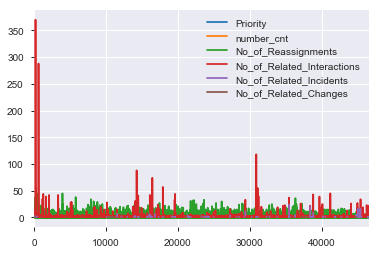

In [66]:
data.plot()

In [67]:
# sb.boxplot(data)

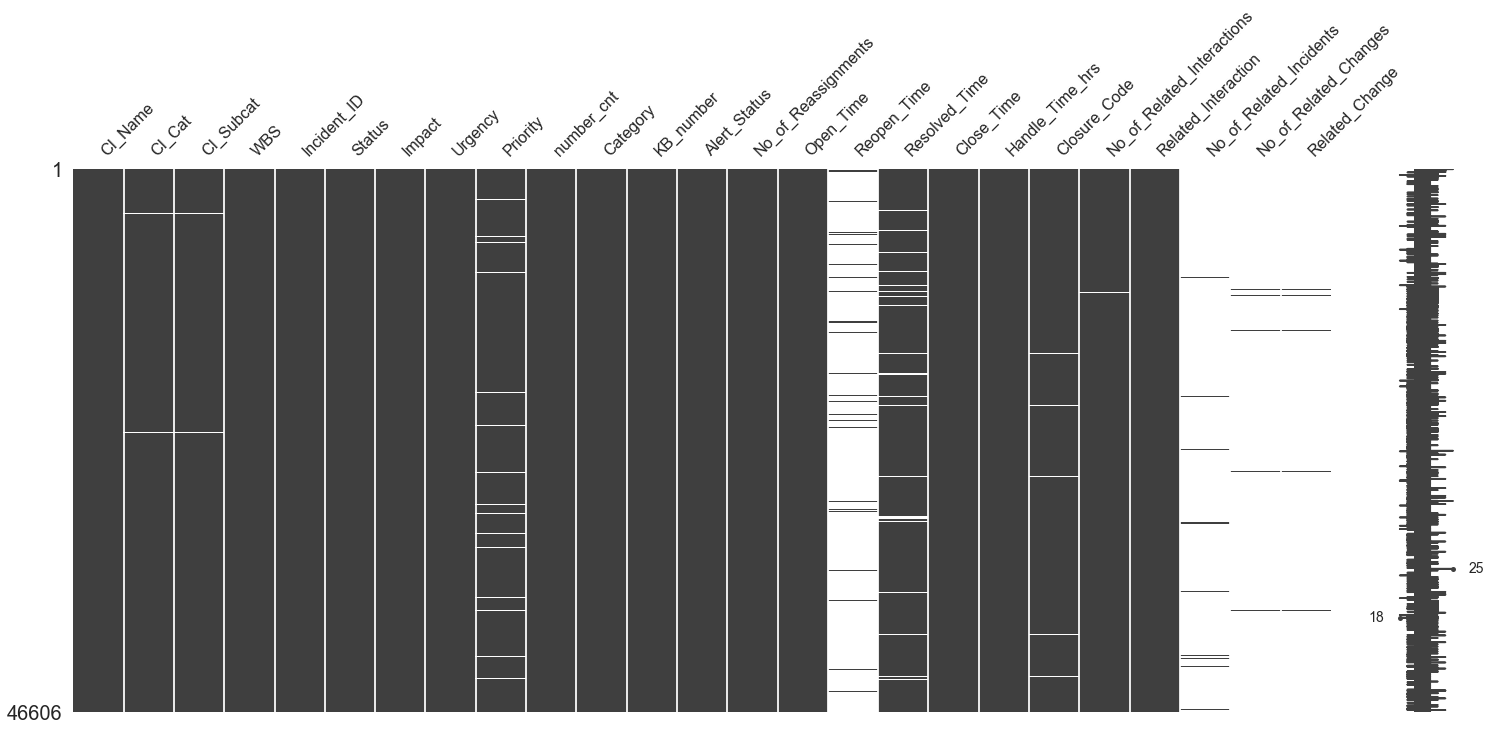

In [68]:
msno.matrix(data)

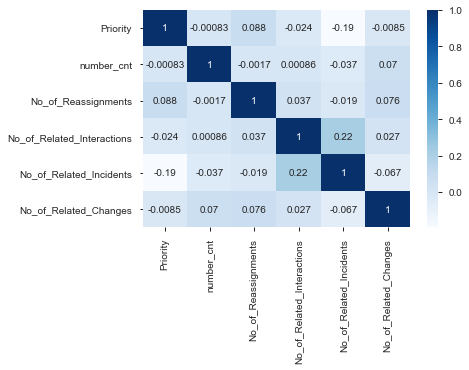

In [69]:
sb.heatmap(data.corr(),cmap='Blues',annot=True)

In [70]:
data.isnull().sum()

CI_Name                           0
CI_Cat                          111
CI_Subcat                       111
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                       1380
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               1
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      114
Related_Interaction               0
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
Related_Change                46046
dtype: int64

In [71]:
data.sort_values("Impact", axis=0, ascending=False, inplace=False,na_position='first').head(8)

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
36142,SBA000313,application,Server Based Application,WBS000054,IM0036452,Closed,NS,3,NaN,0.057682,...,NaN,18-02-2014 16:05,18-02-2014 16:05,"4,19,99,16,667",Other,1.0,SD0110784,NaN,NaN,NaN
40403,LSR001049,computer,Linux Server,WBS000299,IM0040741,Closed,NS,3,NaN,0.821696,...,NaN,NaN,04-03-2014 06:29,"0,798333333",Hardware,1.0,SD0124461,NaN,NaN,NaN
8945,SCN000001,officeelectronics,Scanner,WBS000125,IM0009109,Closed,NS,3,NaN,0.633787,...,NaN,29-10-2013 14:48,29-10-2013 14:48,"0,020555556",Hardware,1.0,SD0024656,NaN,NaN,NaN
8943,SBA000017,application,Server Based Application,WBS000099,IM0009107,Closed,NS,3,NaN,0.327754,...,NaN,29-10-2013 14:36,29-10-2013 14:36,"0,394166667",User error,1.0,SD0024632,NaN,NaN,NaN
44645,WBA000144,application,Web Based Application,WBS000318,IM0045053,Closed,NS,3,NaN,0.101196,...,NaN,20-03-2014 21:29,20-03-2014 21:29,"2,01,44,44,444",Software,1.0,SD0139331,NaN,NaN,NaN
23877,SBA000626,application,Server Based Application,WBS000255,IM0024127,Closed,NS,3,NaN,0.697492,...,NaN,27-12-2013 07:57,27-12-2013 07:57,"24,975",Other,1.0,SD0071828,NaN,NaN,NaN
8928,SBA000017,application,Server Based Application,WBS000099,IM0009092,Closed,NS,3,NaN,0.090264,...,NaN,NaN,29-10-2013 16:17,"0,036111111",User error,1.0,SD0024888,NaN,NaN,NaN
14823,WBA000144,application,Web Based Application,WBS000318,IM0015025,Closed,NS,3,NaN,0.236255,...,NaN,20-11-2013 09:02,20-11-2013 09:02,"5,03,94,44,444",Data,1.0,SD0042748,NaN,NaN,NaN


In [72]:
data.describe()

,Priority,number_cnt,No_of_Reassignments,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
count,45226.000000,46606.000000,46605.000000,46492.000000,1222.000000,560.000000
mean,4.215805,0.499658,1.131831,1.149897,1.669394,1.058929
std,0.705624,0.288634,2.269774,2.556338,3.339687,0.403596
min,1.000000,0.000023,0.000000,1.000000,1.000000,1.000000
25%,4.000000,0.248213,0.000000,1.000000,1.000000,1.000000
50%,4.000000,0.500269,0.000000,1.000000,1.000000,1.000000
75%,5.000000,0.749094,2.000000,1.000000,1.000000,1.000000
max,5.000000,0.999997,46.000000,370.000000,63.000000,9.000000


In [73]:
data.dropna()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
43,SUB000508,subapplication,Web Based Application,WBS000162,IM0000074,Closed,3,3,3.0,0.695187,...,24-03-2014 12:35,24-03-2014 13:28,24-03-2014 13:28,"1,56,41,90,278",Other,2.0,#MULTIVALUE,1.0,1.0,C00000308
24182,SUB000479,subapplication,Web Based Application,WBS000015,IM0024438,Closed,3,3,3.0,0.870326,...,09-01-2014 15:31,20-01-2014 12:06,20-01-2014 12:06,"8,21,34,44,444",Software,2.0,#MULTIVALUE,2.0,9.0,#MULTIVALUE
28487,SBA000604,application,Server Based Application,WBS000067,IM0028762,Closed,2,2,2.0,0.878408,...,29-01-2014 10:10,30-01-2014 08:51,30-01-2014 08:51,"2,93,86,47,222",Other,2.0,#MULTIVALUE,1.0,2.0,#MULTIVALUE
34301,SUB000282,subapplication,Server Based Application,WBS000295,IM0034604,Closed,1,1,1.0,0.014412,...,12-02-2014 12:00,12-02-2014 12:01,12-02-2014 12:01,"3,02,66,11,111",Hardware,1.0,SD0104939,1.0,1.0,C00013982


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
CI_Name                       46606 non-null object
CI_Cat                        46495 non-null object
CI_Subcat                     46495 non-null object
WBS                           46606 non-null object
Incident_ID                   46606 non-null object
Status                        46606 non-null object
Impact                        46606 non-null object
Urgency                       46606 non-null object
Priority                      45226 non-null float64
number_cnt                    46606 non-null float64
Category                      46606 non-null object
KB_number                     46606 non-null object
Alert_Status                  46606 non-null object
No_of_Reassignments           46605 non-null float64
Open_Time                     46606 non-null object
Reopen_Time                   2284 non-null object
Resolved_Time                 44826 non-null object
Close

In [75]:
# data['Urgency'].corr(data['Impact'])

In [76]:
# sb.boxplot(data=data.loc[:,['Urgency','Impact']])

In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


In [84]:
# pd.to_numeric(data)

In [81]:
print(accuracy_score(data.Urgency,data.Impact)) #most accurate

ValueError: Classification metrics can't handle a mix of unknown and multiclass targets

In [ ]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn import tree
from pydotplus import graph_from_dot_data 

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_names)  
graph = graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  